In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import json
import requests
import datetime

import geopandas as gpd

In [2]:
gasoline_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/18100001.csv")
gasoline_df.head()

,REF_DATE,GEO,DGUID,Type of fuel,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,Jan-79,"St. John's, Newfoundland and Labrador",2011S0503001,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735046,2.1,26.0,NaN,NaN,t,1
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",NaN,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735056,3.1,24.6,NaN,NaN,t,1
2,Jan-79,"Halifax, Nova Scotia",2011S0503205,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735057,4.1,23.4,NaN,NaN,t,1
3,Jan-79,"Saint John, New Brunswick",2011S0503310,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735058,5.1,23.2,NaN,NaN,t,1
4,Jan-79,"Québec, Quebec",2011S0503421,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735059,6.1,22.6,NaN,NaN,t,1


In [3]:
gasoline_df.shape

(41942, 15)

In [4]:
gasoline_df.isnull().sum()
gasoline_df = gasoline_df.drop(columns=["STATUS", "SYMBOL", "TERMINATED"])

In [5]:
gasoline_df.describe()
gasoline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41942 entries, 0 to 41941
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       41942 non-null  object 
 1   GEO            41942 non-null  object 
 2   DGUID          39451 non-null  object 
 3   Type of fuel   41942 non-null  object 
 4   UOM            41942 non-null  object 
 5   UOM_ID         41942 non-null  int64  
 6   SCALAR_FACTOR  41942 non-null  object 
 7   SCALAR_ID      41942 non-null  int64  
 8   VECTOR         41942 non-null  object 
 9   COORDINATE     41942 non-null  float64
 10  VALUE          41942 non-null  float64
 11  DECIMALS       41942 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 3.8+ MB


making a new df with the useful features


In [6]:
df = gasoline_df[["REF_DATE", "GEO", "Type of fuel", "VALUE"]].rename(columns={"REF_DATE":"DATE", "Type of fuel":"TYPE"})
df.head(10)

,DATE,GEO,TYPE,VALUE
0,Jan-79,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6
2,Jan-79,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4
3,Jan-79,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2
4,Jan-79,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6
5,Jan-79,"Montréal, Quebec",Regular unleaded gasoline at full service fill...,22.6
6,Jan-79,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",Regular unleaded gasoline at full service fill...,22.8
7,Jan-79,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0
8,Jan-79,"Thunder Bay, Ontario",Regular unleaded gasoline at full service fill...,22.7
9,Jan-79,"Winnipeg, Manitoba",Regular unleaded gasoline at full service fill...,22.0


In [7]:
df[["CITY", "PROVINCE"]] = df["GEO"].str.split(',', n=1, expand=True)
df.head(10)

,DATE,GEO,TYPE,VALUE,CITY,PROVINCE
0,Jan-79,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island
2,Jan-79,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia
3,Jan-79,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick
4,Jan-79,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec
5,Jan-79,"Montréal, Quebec",Regular unleaded gasoline at full service fill...,22.6,Montréal,Quebec
6,Jan-79,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",Regular unleaded gasoline at full service fill...,22.8,Ottawa-Gatineau,"Ontario part, Ontario/Quebec"
7,Jan-79,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario
8,Jan-79,"Thunder Bay, Ontario",Regular unleaded gasoline at full service fill...,22.7,Thunder Bay,Ontario
9,Jan-79,"Winnipeg, Manitoba",Regular unleaded gasoline at full service fill...,22.0,Winnipeg,Manitoba


In [8]:
df["DATE"] = pd.to_datetime(df["DATE"], format="%b-%y")
df["MONTH"] = df["DATE"].dt.month_name().str.slice(stop=3)
df["YEAR"] = df["DATE"].dt.year
df.head(10)

,DATE,GEO,TYPE,VALUE,CITY,PROVINCE,MONTH,YEAR
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979
5,1979-01-01,"Montréal, Quebec",Regular unleaded gasoline at full service fill...,22.6,Montréal,Quebec,Jan,1979
6,1979-01-01,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",Regular unleaded gasoline at full service fill...,22.8,Ottawa-Gatineau,"Ontario part, Ontario/Quebec",Jan,1979
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
8,1979-01-01,"Thunder Bay, Ontario",Regular unleaded gasoline at full service fill...,22.7,Thunder Bay,Ontario,Jan,1979
9,1979-01-01,"Winnipeg, Manitoba",Regular unleaded gasoline at full service fill...,22.0,Winnipeg,Manitoba,Jan,1979


In [9]:
df["VALUE"].describe()

count    41942.000000
mean        84.784858
std         31.492697
min         18.300000
25%         58.200000
50%         79.200000
75%        110.900000
max        191.600000
Name: VALUE, dtype: float64

In [10]:
geo_locs = df.GEO.unique().tolist()
geo_locs

["St. John's, Newfoundland and Labrador",
 'Charlottetown and Summerside, Prince Edward Island',
 'Halifax, Nova Scotia',
 'Saint John, New Brunswick',
 'Québec, Quebec',
 'Montréal, Quebec',
 'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
 'Toronto, Ontario',
 'Thunder Bay, Ontario',
 'Winnipeg, Manitoba',
 'Regina, Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Edmonton, Alberta',
 'Calgary, Alberta',
 'Vancouver, British Columbia',
 'Victoria, British Columbia',
 'Whitehorse, Yukon',
 'Yellowknife, Northwest Territories']

In [11]:
df.TYPE.unique().tolist()

['Regular unleaded gasoline at full service filling stations',
 'Regular unleaded gasoline at self service filling stations',
 'Premium unleaded gasoline at full service filling stations',
 'Premium unleaded gasoline at self service filling stations',
 'Diesel fuel at full service filling stations',
 'Household heating fuel',
 'Diesel fuel at self service filling stations']

In [12]:
quebec_loc = df[df["GEO"]=="Québec, Quebec"]
quebec_loc.head(5)

,DATE,GEO,TYPE,VALUE,CITY,PROVINCE,MONTH,YEAR
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979
19,1979-02-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.7,Québec,Quebec,Feb,1979
34,1979-03-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.8,Québec,Quebec,Mar,1979
49,1979-04-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,23.0,Québec,Quebec,Apr,1979
64,1979-05-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,23.2,Québec,Quebec,May,1979


In [13]:
year_2000 = df[df.YEAR == 2000]
year_2000.head(5)

,DATE,GEO,TYPE,VALUE,CITY,PROVINCE,MONTH,YEAR
16168,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,78.0,St. John's,Newfoundland and Labrador,Jan,2000
16169,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at self service fill...,74.9,St. John's,Newfoundland and Labrador,Jan,2000
16170,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at full service fill...,84.5,St. John's,Newfoundland and Labrador,Jan,2000
16171,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at self service fill...,81.3,St. John's,Newfoundland and Labrador,Jan,2000
16172,2000-01-01,"St. John's, Newfoundland and Labrador",Diesel fuel at full service filling stations,69.2,St. John's,Newfoundland and Labrador,Jan,2000


In [14]:
yellowknife_2000_corr = df[(df.YEAR == 2000)&(df.CITY == "Yellowknife")]
yellowknife_2000_corr.head(5)

,DATE,GEO,TYPE,VALUE,CITY,PROVINCE,MONTH,YEAR
16279,2000-01-01,"Yellowknife, Northwest Territories",Regular unleaded gasoline at full service fill...,77.9,Yellowknife,Northwest Territories,Jan,2000
16280,2000-01-01,"Yellowknife, Northwest Territories",Regular unleaded gasoline at self service fill...,77.9,Yellowknife,Northwest Territories,Jan,2000
16281,2000-01-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at full service fill...,82.7,Yellowknife,Northwest Territories,Jan,2000
16282,2000-01-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at self service fill...,84.8,Yellowknife,Northwest Territories,Jan,2000
16283,2000-01-01,"Yellowknife, Northwest Territories",Diesel fuel at full service filling stations,72.0,Yellowknife,Northwest Territories,Jan,2000


In [15]:
cities = ["Yellowknife", "Halifax", "Calgary"]
CTE = df[df.CITY.isin(cities)]
CTE.head(5)

,DATE,GEO,TYPE,VALUE,CITY,PROVINCE,MONTH,YEAR
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
17,1979-02-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.6,Halifax,Nova Scotia,Feb,1979
28,1979-02-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Feb,1979
32,1979-03-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.5,Halifax,Nova Scotia,Mar,1979


In [16]:
house_79_20 = df[(df.YEAR == 1979) | (df.YEAR == 2000) & (df.TYPE == "Household heating fuel")]
house_79_20.head(5)

,DATE,GEO,TYPE,VALUE,CITY,PROVINCE,MONTH,YEAR
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979


In [17]:
geo = df.groupby(['GEO'])
geo.ngroups

18

In [18]:
group_year = df.groupby(['YEAR'])['VALUE'].mean()
group_year

YEAR
1979     23.604444
1980     28.068750
1981     38.002604
1982     44.701563
1983     47.904688
1984     50.442708
1985     53.899479
1986     48.405208
1987     49.758333
1988     49.217188
1989     51.700000
1990     55.048735
1991     56.527041
1992     54.633832
1993     54.334734
1994     54.247899
1995     56.177451
1996     58.134110
1997     59.182062
1998     56.247246
1999     58.743362
2000     72.207839
2001     72.403107
2002     70.312147
2003     75.541667
2004     82.960452
2005     96.328743
2006    101.209393
2007    105.258263
2008    123.340678
2009     96.969068
2010    106.369845
2011    126.790607
2012    130.380085
2013    129.677273
2014    133.169203
2015    110.366908
2016    101.790821
2017    112.852657
2018    129.408575
2019    125.776329
2020    107.617150
2021    133.990580
Name: VALUE, dtype: float64

In [19]:
price_acc_to_city = df.groupby(["CITY", "YEAR"])["VALUE"].median()
price_acc_to_city

CITY         YEAR
Calgary      1979     19.15
             1980     23.25
             1981     32.10
             1982     37.50
             1983     42.55
                      ...  
Yellowknife  2017    116.95
             2018    136.25
             2019    133.45
             2020    113.70
             2021    138.65
Name: VALUE, Length: 751, dtype: float64

     YEAR                                                GEO   Value
0    1979                                   Calgary, Alberta   19.61
1    1979  Charlottetown and Summerside, Prince Edward Is...   25.82
2    1979                                  Edmonton, Alberta   19.08
3    1979                               Halifax, Nova Scotia   24.52
4    1979                                   Montréal, Quebec   23.86
..    ...                                                ...     ...
746  2021                        Vancouver, British Columbia  151.04
747  2021                         Victoria, British Columbia  151.30
748  2021                                  Whitehorse, Yukon  141.50
749  2021                                 Winnipeg, Manitoba  127.48
750  2021                 Yellowknife, Northwest Territories  136.13

[751 rows x 3 columns]


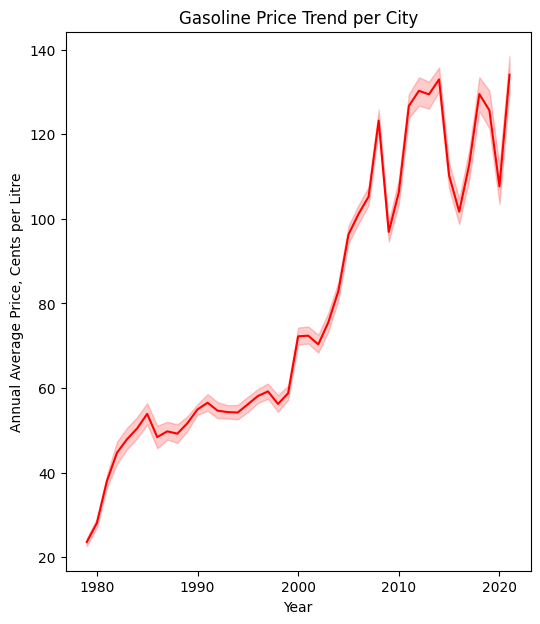

In [20]:
plot1 = df.groupby(["YEAR", "GEO"])["VALUE"].mean().reset_index(name="Value").round(2)
print(plot1)
plt.figure(figsize=(6,7))
sns.lineplot(plot1, x="YEAR", y="Value", color="red")
plt.title("Gasoline Price Trend per City")
plt.xlabel("Year")
plt.ylabel("Annual Average Price, Cents per Litre")
plt.show()

   MONTH   value
3    Feb  112.65
4    Jan  116.05
7    Mar  120.85
11   Sep  121.80
1    Aug  123.75
6    Jun  126.40
10   Oct  126.50
5    Jul  127.30
9    Nov  127.45
2    Dec  129.60
0    Apr  130.85
8    May  131.85


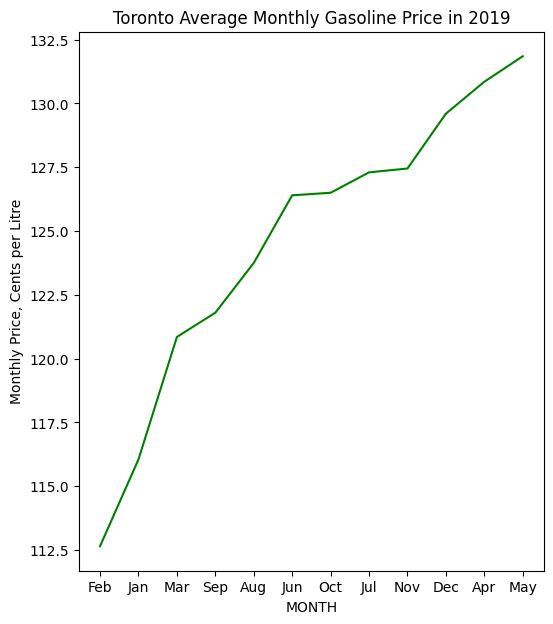

In [21]:
tor_trend_2019 = df[(df.GEO == "Toronto, Ontario") & (df.YEAR == 2019)]
plot2 = tor_trend_2019.groupby(["MONTH"])["VALUE"].median().reset_index().sort_values(by="VALUE").rename(columns={"VALUE":"value"})
print(plot2)

plt.figure(figsize=(6,7))
sns.lineplot(plot2, x="MONTH", y="value", color="green")
plt.ylabel("Monthly Price, Cents per Litre")
plt.title("Toronto Average Monthly Gasoline Price in 2019")
plt.show()

     YEAR                          CITY   VALUE
0    1979                       Calgary   19.61
1    1979  Charlottetown and Summerside   25.82
2    1979                      Edmonton   19.08
3    1979                       Halifax   24.52
4    1979                      Montréal   23.86
..    ...                           ...     ...
746  2021                     Vancouver  151.04
747  2021                      Victoria  151.30
748  2021                    Whitehorse  141.50
749  2021                      Winnipeg  127.48
750  2021                   Yellowknife  136.13

[751 rows x 3 columns]


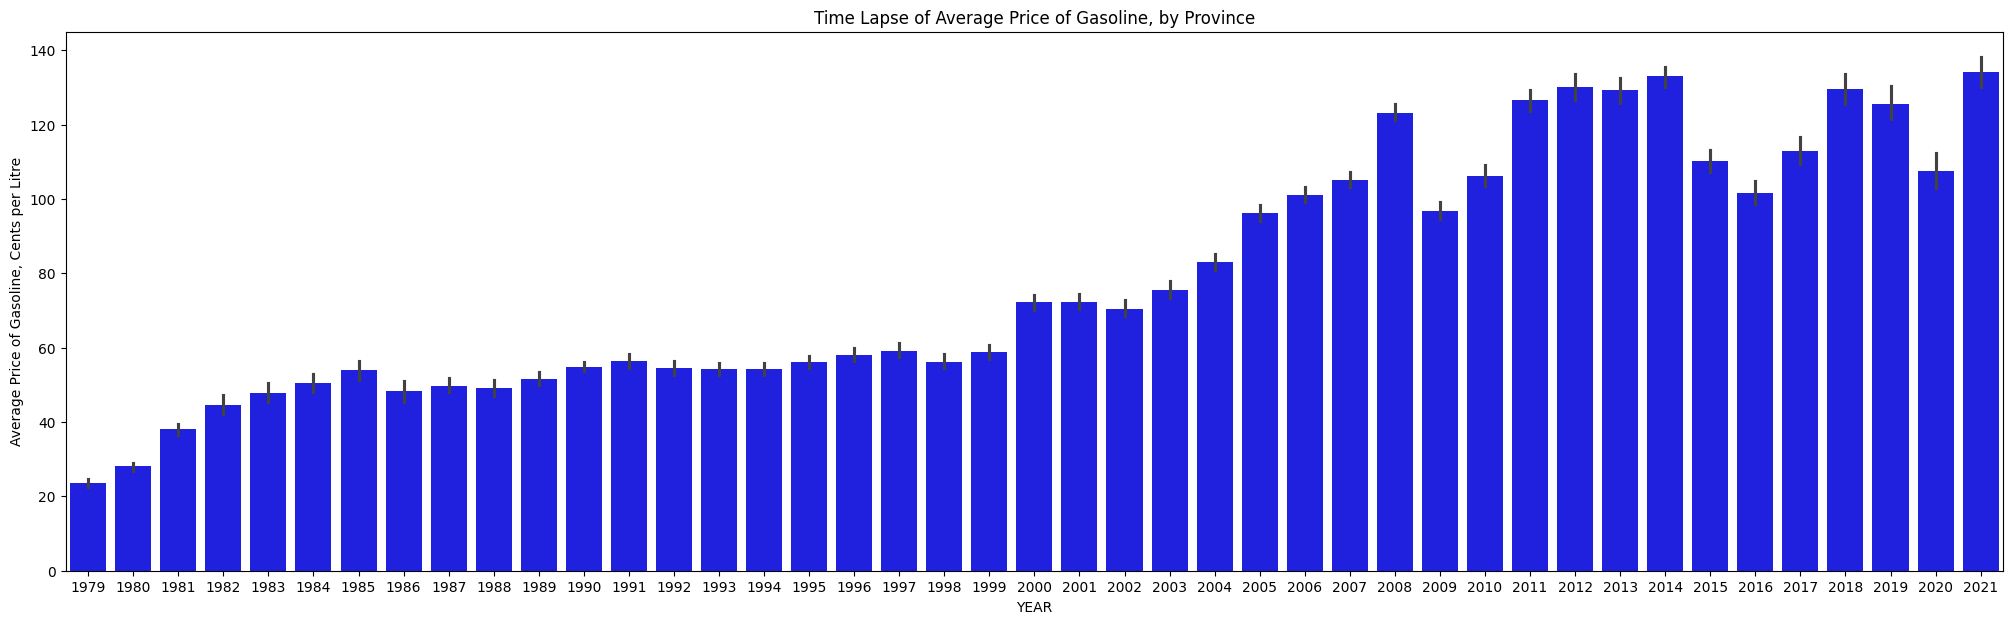

In [22]:
byyear = df.groupby(["YEAR", "CITY"])["VALUE"].mean().reset_index(name="VALUE").round(2)
print(byyear)

plt.figure(figsize=(25,7))
sns.barplot(byyear, x="YEAR", y="VALUE", color="blue")
plt.ylabel("Average Price of Gasoline, Cents per Litre")
plt.title("Time Lapse of Average Price of Gasoline, by Province")
plt.show()

In [23]:
one_year = df[df.YEAR == 2021].reset_index()
one_year.head()

geodata = one_year.groupby(["PROVINCE"])["VALUE"].mean().reset_index(name="Average price for gasoline").round(2)
geodata

provinces={' Newfoundland and Labrador':5,
    ' Prince Edward Island':8,
    ' Nova Scotia':2,
    ' New Brunswick':7,
    ' Quebec':1,
    ' Ontario':11,
    ' Ontario part, Ontario/Quebec':12,
    ' Manitoba':10,
    ' Saskatchewan':3,
    ' Alberta':4,
    ' British Columbia':6,
    ' Yukon':9,
    ' Northwest Territories':13
}

geodata["PROVINCE_ID"] = geodata["PROVINCE"].map(provinces)
display(geodata)

,PROVINCE,Average price for gasoline,PROVINCE_ID
0,Alberta,130.48,4
1,British Columbia,151.17,6
2,Manitoba,127.48,10
3,New Brunswick,128.35,7
4,Newfoundland and Labrador,135.54,5
5,Northwest Territories,136.13,13
6,Nova Scotia,123.54,2
7,Ontario,140.85,11
8,"Ontario part, Ontario/Quebec",135.79,12
9,Prince Edward Island,123.80,8


In [24]:
geo_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/canada_provinces.geojson"
geo = requests.get(geo_url)
mp = json.loads(geo.text)

mp

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-131.077103, 52.150089],
       [-130.948105, 52.093609],
       [-130.992493, 52.060822],
       [-131.070007, 52.07222],
       [-130.985504, 52.012211],
       [-131.041702, 52.022491],
       [-131.007004, 51.97887],
       [-131.0392, 51.96693],
       [-131.021698, 51.94083],
       [-131.110306, 51.999161],
       [-131.085007, 52.023319],
       [-131.120499, 52.05555],
       [-131.122696, 52.123779],
       [-131.077103, 52.150089]]],
     [[[-130.164993, 55.01416],
       [-130.149704, 54.947491],
       [-130.270294, 54.83083],
       [-130.3992, 54.764721],
       [-130.459396, 54.817501],
       [-130.213303, 55.012501],
       [-130.164993, 55.01416]]],
     [[[-130.458603, 54.80027],
       [-130.435806, 54.763329],
       [-130.463303, 54.708599],
       [-130.538605, 54.70388],
       [-130.610504, 54.753052],
       [-130.458603, 54.80027]]],

In [25]:
gdf = gpd.GeoDataFrame.from_features(mp["features"])
gdf = gdf.rename(columns={"cartodb_id":"PROVINCE_ID"})

gdf.info()

merged = gdf.merge(geodata, on="PROVINCE_ID")
merged.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          13 non-null     geometry
 1   PROVINCE_ID       13 non-null     int64   
 2   draworder         0 non-null      object  
 3   visibility        13 non-null     int64   
 4   extrude           13 non-null     int64   
 5   tessellate        13 non-null     int64   
 6   nom               13 non-null     object  
 7   icon              0 non-null      object  
 8   altitudemode      13 non-null     object  
 9   description       0 non-null      object  
 10  name              13 non-null     object  
 11  _end              0 non-null      object  
 12  begin             0 non-null      object  
 13  timestamp         0 non-null      object  
 14  show              13 non-null     object  
 15  _2012_membership  13 non-null     int64   
dtypes: geometry(1), int6

,geometry,PROVINCE_ID,draworder,visibility,extrude,tessellate,nom,icon,altitudemode,description,name,_end,begin,timestamp,show,_2012_membership,PROVINCE,Average price for gasoline
0,"MULTIPOLYGON (((-131.0771 52.15009, -130.9481 ...",6,None,-1,-1,-1,Colombie-Britannique,None,relativeToGround,None,British Columbia,None,None,None,y,39859,British Columbia,151.17
1,"MULTIPOLYGON (((-55.88306 53.48638, -55.72944 ...",5,None,-1,-1,-1,Terre-Neuve-et-Labrador,None,relativeToGround,None,Newfoundland and Labrador,None,None,None,n,974,Newfoundland and Labrador,135.54
2,"MULTIPOLYGON (((-110.3944 78.75221, -109.97841...",13,None,-1,-1,-1,Territories Nord-Ouest,None,relativeToGround,None,Northwest Territories,None,None,None,n,124,Northwest Territories,136.13
3,"MULTIPOLYGON (((-109.97841 78.67106, -109.4053...",12,None,-1,-1,-1,Nunavut,None,relativeToGround,None,Nunavut,None,None,None,n,24,"Ontario part, Ontario/Quebec",135.79
4,"MULTIPOLYGON (((-102.0017 59.99992, -102.0009 ...",3,None,-1,-1,-1,Saskatchewan,None,relativeToGround,None,Saskatchewan,None,None,None,y,11243,Saskatchewan,125.89


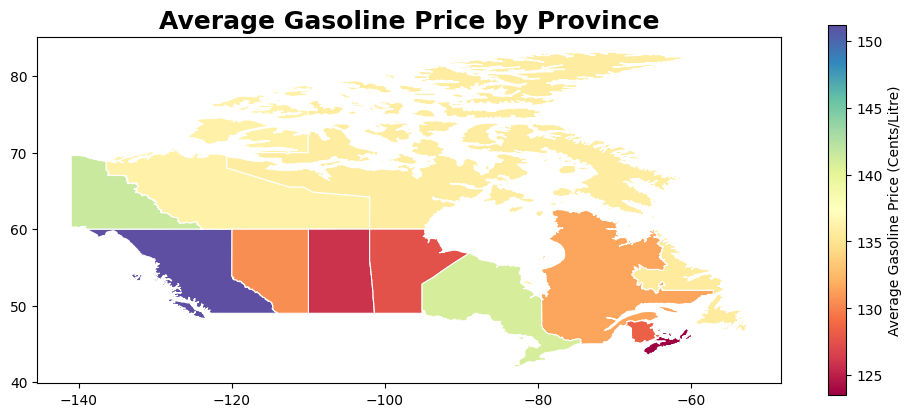

In [26]:
fig, plot3 = plt.subplots(figsize=(12, 8))

merged.plot(
    column="Average price for gasoline",
    cmap="Spectral",
    linewidth=0.8,
    edgecolor='white',
    ax=plot3,
    legend=True,
    legend_kwds={'label': "Average Gasoline Price (Cents/Litre)", 'shrink': 0.6}
)
plot3.set_title('Average Gasoline Price by Province', fontsize=18, fontweight='bold')
plt.show()